# <u>Aim</u> :- Find the Outlier from the given dataset using trimming & capping method

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('Data/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


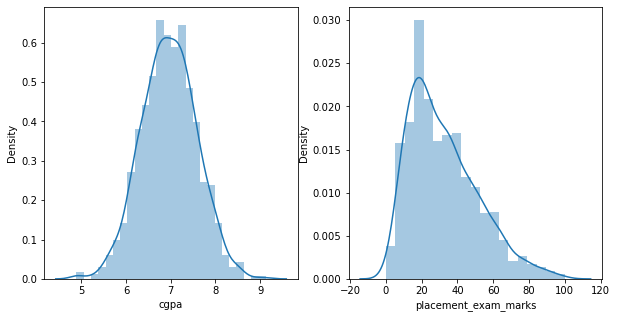

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

#plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [31]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

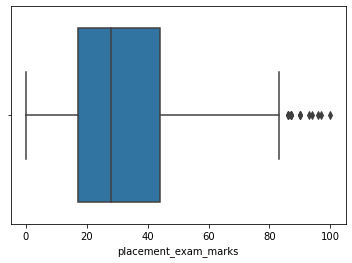

In [32]:
sns.boxplot(df['placement_exam_marks'])

In [33]:
# treatment of oulier using capping
# finding boundaries values
print('Highest boundary value of cgpa',df['cgpa'].mean()+3*df['cgpa'].std())
print('Lowest boundary value of cgpa',df['cgpa'].mean()-3*df['cgpa'].std())
# mean+3sigma, mean-3sigma

Highest boundary value of cgpa 8.808933625397177
Lowest boundary value of cgpa 5.113546374602842


In [34]:
# finding ouliers
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [35]:
df.shape

(1000, 3)

In [36]:
df2=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [37]:
df2.shape # after removing outlier size of dataset

(995, 3)

# Z_Score

**zi=xi-x_Mean/S.D when data is normally distributed use z-score method**

In [38]:
df['z_score_value']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()


,cgpa,placement_exam_marks,placed,z_score_value
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [39]:
df['z_score_value'].describe()

count    1.000000e+03
mean    -1.600275e-14
std      1.000000e+00
min     -3.362960e+00
25%     -6.677081e-01
50%     -2.013321e-03
75%      6.636815e-01
max      3.505062e+00
Name: z_score_value, dtype: float64

In [40]:
df[df['z_score_value']>3]

,cgpa,placement_exam_marks,placed,z_score_value
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [41]:
df[df['z_score_value']<-3]

,cgpa,placement_exam_marks,placed,z_score_value
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [42]:
df3=df[(df['z_score_value']>3) | (df['z_score_value']<-3)]
df3

,cgpa,placement_exam_marks,placed,z_score_value
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [43]:
df4=df[(df['z_score_value']<3) & (df['z_score_value']>-3)]
df4.shape

(995, 4)

# Capping

In [44]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [45]:
lower_limit

5.113546374602842

In [46]:
upper_limit

8.808933625397177

In [47]:
df['cgpa_cap']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
    df['cgpa']<lower_limit,
    lower_limit,df['cgpa']
  )
)


In [48]:
df.describe()

,cgpa,placement_exam_marks,placed,z_score_value,cgpa_cap
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,6.961240,32.225000,0.489000,-1.600275e-14,6.961499
std,0.615898,19.130822,0.500129,1.000000e+00,0.612688
min,4.890000,0.000000,0.000000,-3.362960e+00,5.113546
25%,6.550000,17.000000,0.000000,-6.677081e-01,6.550000
50%,6.960000,28.000000,0.000000,-2.013321e-03,6.960000
75%,7.370000,44.000000,1.000000,6.636815e-01,7.370000
max,9.120000,100.000000,1.000000,3.505062e+00,8.808934
